## Demonstration of Univariate Polynomial Regression

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the application of univariate polynomial regression to estimate the parameters of a polynomial predictor model from a set of examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by implementing a polynomial relationship between the dependent $x$ and independent variable $y$, and additive normal distributed noise.

In [2]:
N = 150  # total number of examples
theta = [2, 2e-1, 5e-2, 1e-2, 1e-5]  # coefficients of polynomial data generation model


def generate_data(theta, N):

    X = np.random.uniform(low=-10, high=10, size=N)
    Xv = np.vander(X, len(theta), increasing=True)
    Y = Xv @ theta
    # add normal distributed noise
    Y += 2 * np.random.normal(size=N)

    return X, Y


X, Y = generate_data(theta, N)

The data points are plotted in order to investigate the structure of the dataset. This way, the non-linear relationship between the independent and dependent variable becomes clearly visible.

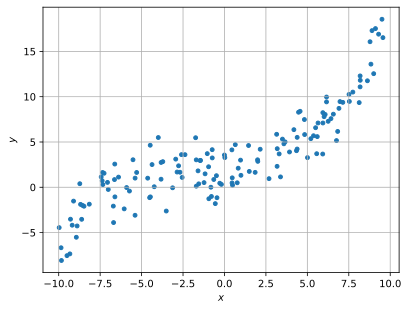

In [3]:
def plot_data(X, Y, ylabel=r'$y$', alpha=1):

    plt.scatter(X, Y, s=15, label=r'examples $(x_n, y_n)$', alpha=alpha)
    plt.xlabel(r'$x$')
    plt.ylabel(ylabel)
    plt.grid()


plot_data(X, Y)

### Estimate Parameters of Polynomial Regression

The parameters of the polynomial model are estimated by performing a regularized multivariate regression using the lifted features.

In [4]:
def polynomial_regression(X, Y, N, mu=0):

    Xv = np.vander(X, N, increasing=True)
    theta = np.linalg.inv((Xv.T @ Xv) + mu * np.eye(Xv.shape[1])) @ Xv.T @ Y

    return theta


def predict(X, theta):

    Xv = np.vander(X, len(theta), increasing=True)
    Y = np.dot(Xv, theta)

    return Y


P = len(theta)  # order of data generation model
theta_hat = polynomial_regression(X, Y, P, mu=0)

Comparison of the estimated and true parameters reveals some differences between the polynomial coefficients of the data model and the estimated coefficients of the polynomial regression

In [5]:
print('Coefficients of data model')
print([ '{:0.5f}'.format(x) for x in theta])

print('\nEstimated coefficients of polynomial regression')
print([ "{:0.5f}".format(x) for x in theta_hat])

Coefficients of data model
['2.00000', '0.20000', '0.05000', '0.01000', '0.00001']

Estimated coefficients of polynomial regression
['1.90313', '0.15989', '0.06373', '0.01070', '-0.00023']


A common visualization of polynomial regression is to show the data points together with the estimated polynomial predictor illustrated by a (regression) line. Note, points on the regression line constitute the output $\hat{y}$ of the linear predictor for a given feature $x$.

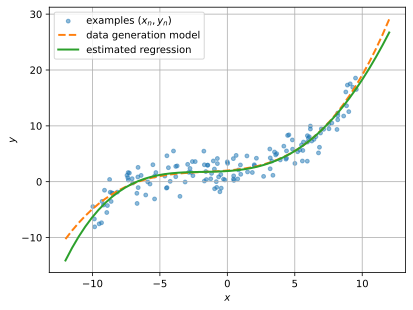

In [6]:
# plot data points
plot_data(X, Y, alpha=.5)

# plot regression lines
xl = np.linspace(-12, 12)
plt.plot(xl, predict(xl, theta), color='C1', linestyle='--',
         linewidth=2, label='data generation model')
plt.plot(xl, predict(xl, theta_hat), color='C2', linestyle='-',
         linewidth=2, label='estimated regression')
plt.legend()

### Evaluation

Various measures are used to evaluate the performance of polynomial regression. The most common ones are demonstrated in the following.

#### Residuals Plot

The statistical properties of the residual error $e = y_n - \hat{y}_n$ provide insights into the validity of the polynomial model and if the underlying assumptions are met. Lets first plot the residual error, together with its mean $\mu_e$ and standard deviation $\sigma_e$. Inspection of the plot reveals that the error is mean free and the spread of the values is approximately constant over the features $x_n$.

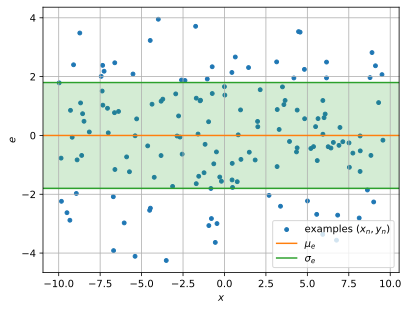

In [7]:
Y_hat = predict(X, theta_hat)
e = Y - Y_hat
mu_e = np.mean(e)
std_e = np.std(e)

plot_data(X, e, ylabel=r'$e$')
plt.axhline(y=mu_e, color='C1', label=r'$\mu_e$')
plt.axhline(y=std_e, color='C2', label=r'$\sigma_e$')
plt.axhline(y=-std_e, color='C2')
plt.axhspan(-std_e, std_e, facecolor='C2', alpha=0.2)
plt.legend()

#### Performance Metrics

The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ is a common measure for the goodness-of-fit of an estimated model. Is bases on the total sum-of-squares and the residual sum-of-squares.

In [8]:
TSS = np.sum((Y - np.mean(Y))**2)
RSS = np.sum((Y-Y_hat)**2)
Rs = 1 - RSS/TSS

print('Total sum-of-squares (TSS): \t {0:.5f}'.format(TSS))
print('Residual sum-of-squares (RSS): \t {0:.5f}'.format(RSS))
print('Coefficient of determination: \t {0:.5f}'.format(Rs))

Total sum-of-squares (TSS): 	 3845.78709
Residual sum-of-squares (RSS): 	 485.39594
Coefficient of determination: 	 0.87379


**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.